In [2]:
import numpy as np
import pandas as pd
import datetime

import os


In [3]:
import time

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [4]:
sns.set(rc={'figure.figsize':(12,5)})

plt.figure(figsize=(12,5))

In [5]:
train = pd.read_csv('train.csv' , nrows=10000000)
test = pd.read_csv('test.csv')

In [6]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [7]:
test.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


In [8]:
variables = ['ip','app','device','os','channel']

for v in variables:
    train[v] = train[v].astype('category')
    test[v] = test[v].astype('category')

In [12]:
train.ip.dtype

category

In [13]:
train['click_time'] = pd.to_datetime(train['click_time'])
train.attributed_time = pd.to_datetime(train.attributed_time)

test.click_time = pd.to_datetime(test.click_time)

train.is_attributed = train.is_attributed.astype('category')

In [14]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0


In [15]:
train.describe()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,10000000,18717,10000000.0
unique,68740.0,332.0,940.0,292.0,170.0,29943,15698,2.0
top,73516.0,12.0,1.0,19.0,245.0,2017-11-06 16:05:10,2017-11-06 23:36:23,0.0
freq,51711.0,1291185.0,9381146.0,2410148.0,793105.0,1261,6,9981283.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 14:32:21,2017-11-06 16:00:47,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-07 00:12:03,2017-11-07 15:59:53,NaN


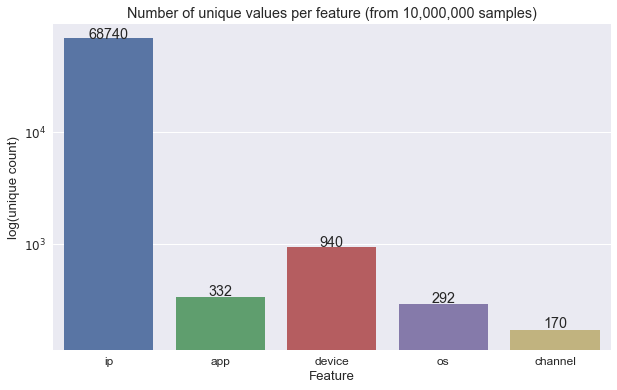

In [16]:
plt.figure(figsize=(10, 6))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature (from 10,000,000 samples)')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

In [17]:
train[['attributed_time' , 'is_attributed']][train.is_attributed == 1].describe()

,attributed_time,is_attributed
count,18717,18717.0
unique,15698,1.0
top,2017-11-06 23:36:23,1.0
freq,6,18717.0
first,2017-11-06 16:00:47,NaN
last,2017-11-07 15:59:53,NaN


In [19]:
test.click_id = test.click_id.astype('category')
test.describe()

,click_id,ip,app,device,os,channel,click_time
count,18790469.0,18790469.0,18790469.0,18790469.0,18790469.0,18790469.0,18790469
unique,18790469.0,93936.0,417.0,1985.0,395.0,178.0,21603
top,18790468.0,5348.0,9.0,1.0,19.0,107.0,2017-11-10 09:00:10
freq,1.0,182522.0,2872176.0,17360269.0,4334532.0,1214650.0,1466
first,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 04:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-10 15:00:00


In [20]:
temp = train.ip.value_counts().reset_index(name='counts')

temp.columns = ['ip','counts']

temp[:10]

,ip,counts
0,73516,51711
1,73487,51215
2,5314,35073
3,5348,35004
4,53454,25381
5,105560,23289
6,100275,23070
7,114276,22774
8,201182,22719
9,105475,22047


In [21]:
train = train.merge(temp , on='ip',how='left')

In [22]:
train[train.is_attributed == 1].sort_values('counts' , ascending=False)[:10]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,counts
7912764,73516,34,1,19,243,2017-11-06 23:28:13,2017-11-07 01:13:45,1,51711
289189,73516,19,3033,21,213,2017-11-06 16:05:33,2017-11-06 16:05:52,1,51711
3350587,73516,72,1,18,101,2017-11-06 17:46:37,2017-11-07 09:46:44,1,51711
3416495,73516,10,1,25,377,2017-11-06 17:50:33,2017-11-06 18:50:59,1,51711
6331848,73516,29,1,14,213,2017-11-06 22:36:25,2017-11-07 02:10:05,1,51711
7543731,73516,155,1,19,213,2017-11-06 23:18:10,2017-11-07 15:07:40,1,51711
5144374,73516,9,1,37,234,2017-11-06 20:49:25,2017-11-06 20:53:19,1,51711
3651360,73516,107,1,19,171,2017-11-06 18:05:12,2017-11-06 23:44:44,1,51711
6368416,73516,10,1,13,377,2017-11-06 22:38:04,2017-11-06 22:52:43,1,51711
2073360,73516,9,1,13,134,2017-11-06 16:52:12,2017-11-06 16:52:20,1,51711


In [23]:
train[train.is_attributed == 1].ip.describe()

count     18717.000000
mean     124570.909708
std       60469.241336
min          25.000000
25%       75282.000000
50%      137658.000000
75%      174804.000000
max      212767.000000
Name: ip, dtype: float64

In [24]:
train.is_attributed = train.is_attributed.astype(int)

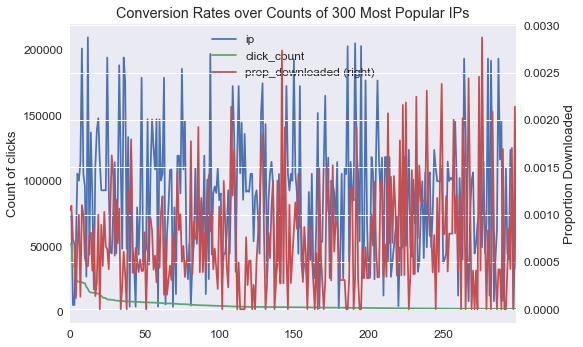

Counversion Rates over Counts of Most Popular IPs
        ip  click_count  prop_downloaded
0    73516        51711         0.001044
1    73487        51215         0.001093
2     5314        35073         0.000741
3     5348        35004         0.000686
4    53454        25381         0.000118
5   105560        23289         0.000687
6   100275        23070         0.000997
7   114276        22774         0.000132
8   201182        22719         0.001100
9   105475        22047         0.000998
10   95766        21966         0.000546
11   26995        19166         0.000470
12  209663        17605         0.000454
13   43793        15398         0.000779
14  137052        14840         0.000809
15   86767        14742         0.000407
16   17149        14673         0.000886
17  111025        14493         0.000138
18  138561        14119         0.000283
19  147957        14012         0.000999


In [25]:
proportion = train[['ip', 'is_attributed']].groupby('ip', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train[['ip', 'is_attributed']].groupby('ip', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='ip', how='left')
merge.columns = ['ip', 'click_count', 'prop_downloaded']

ax = merge[:300].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 300 Most Popular IPs')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Counversion Rates over Counts of Most Popular IPs')
print(merge[:20])

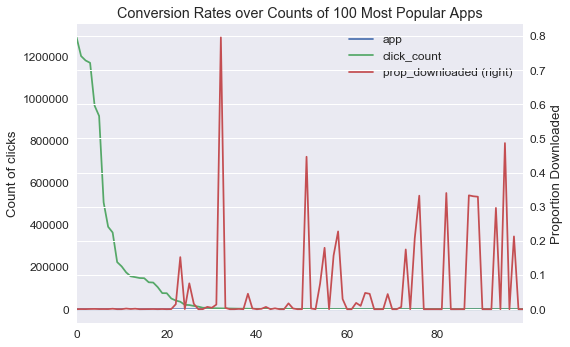

Counversion Rates over Counts of Most Popular Apps
    app  click_count  prop_downloaded
0    12      1291185         0.000140
1     2      1202534         0.000388
2    15      1181585         0.000277
3     3      1170412         0.000630
4     9       966839         0.000869
5    18       917820         0.000397
6    14       507491         0.000483
7     1       391508         0.000350
8     8       364361         0.001441
9    21       223823         0.000089
10   13       203332         0.000103
11   20       174792         0.001962
12   24       156247         0.000550
13   11       152367         0.001503
14   23       148119         0.000027
15    6       147356         0.000176
16   64       127923         0.000258
17   26       126630         0.000537
18   25       104855         0.000095
19   27        76417         0.000523


In [26]:
proportion = train[['app', 'is_attributed']].groupby('app', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train[['app', 'is_attributed']].groupby('app', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='app', how='left')
merge.columns = ['app', 'click_count', 'prop_downloaded']

ax = merge[:100].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 100 Most Popular Apps')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Counversion Rates over Counts of Most Popular Apps')
print(merge[:20])

In [27]:
proportion = train[['device', 'is_attributed']].groupby('device', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train[['device', 'is_attributed']].groupby('device', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='device', how='left')
merge.columns = ['device', 'click_count', 'prop_downloaded']

print('Count of clicks and proportion of downloads by device:')
print(merge)

Count of clicks and proportion of downloads by device:
     device  click_count  prop_downloaded
0         1      9381146         0.001326
1         2       456617         0.000208
2      3032       104393         0.000000
3         0        46476         0.091961
4        59         1618         0.001236
5        40          462         0.246753
6         6          458         0.222707
7        16          334         0.242515
8        18          247         0.226721
9        33          204         0.196078
10       21          190         0.242105
11     3033          151         0.178808
12      154          151         0.178808
13       37          145         0.193103
14       30          126         0.301587
15       46          123         0.211382
16      114          122         0.172131
17        7          121         0.231405
18       88          117         0.324786
19      109          113         0.300885
20       67          111         0.297297
21      748          

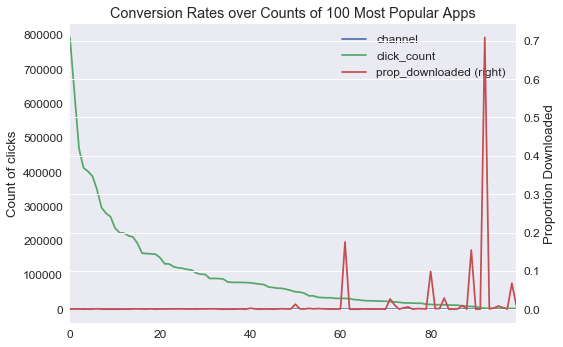

Counversion Rates over Counts of Most Popular Channels
    channel  click_count  prop_downloaded
0       245       793105         0.000105
1       134       630888         0.000558
2       259       469845         0.000653
3       477       412559         0.000073
4       121       402226         0.000323
5       107       388035         0.000379
6       145       348862         0.001155
7       153       296832         0.000182
8       205       279720         0.000232
9       178       269720         0.000119
10      265       236949         0.000236
11      128       223205         0.000130
12      140       222096         0.000347
13      459       214060         0.000187
14      442       210687         0.000646
15      215       191618         0.000778
16      122       163312         0.000582
17      280       162425         0.000345
18      379       161608         0.000811
19      135       160215         0.000200


In [28]:
proportion = train[['channel', 'is_attributed']].groupby('channel', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train[['channel', 'is_attributed']].groupby('channel', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='channel', how='left')
merge.columns = ['channel', 'click_count', 'prop_downloaded']

ax = merge[:100].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 100 Most Popular Apps')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Counversion Rates over Counts of Most Popular Channels')
print(merge[:20])

In [29]:
train_smp = pd.read_csv('train_sample.csv')

train_smp.head(7)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0


In [30]:
train_smp.click_time = pd.to_datetime(train_smp.click_time)
train_smp.attributed_time = pd.to_datetime(train_smp.attributed_time)

In [31]:
train_smp['click_rnd'] = train_smp.click_time.dt.round('H')

In [32]:
train_smp.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_rnd
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,2017-11-07 10:00:00
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,2017-11-07 14:00:00
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0,2017-11-07 18:00:00
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0,2017-11-07 05:00:00
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0,2017-11-09 09:00:00


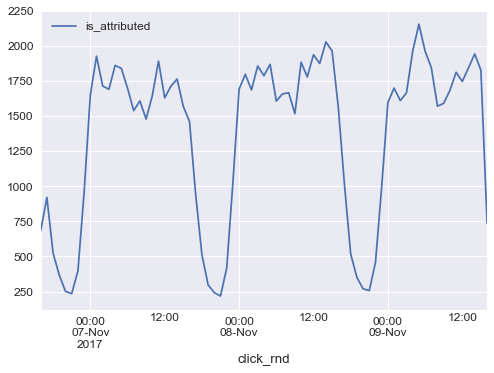

In [33]:
train_smp[['click_rnd','is_attributed']].groupby(['click_rnd'] ,as_index=True).count().plot()

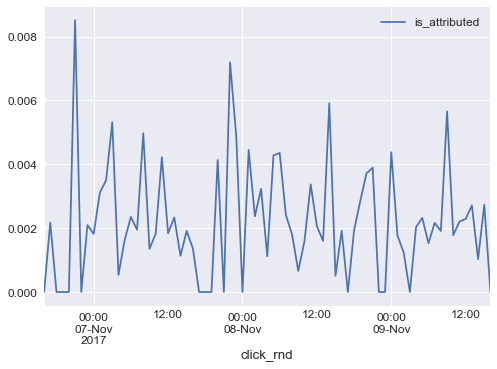

In [34]:
train_smp[['click_rnd','is_attributed']].groupby(['click_rnd'] , as_index=True).mean().plot()

In [35]:
train_smp['click_hour'] = train_smp.click_time.dt.hour
#先用pd.to_datetime()
#然后就可以使用.dt.hour .dt.minute 等 获取具体时间值

In [36]:
train_smp.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_rnd,click_hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,2017-11-07 10:00:00,9
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,2017-11-07 14:00:00,13
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0,2017-11-07 18:00:00,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0,2017-11-07 05:00:00,4
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0,2017-11-09 09:00:00,9


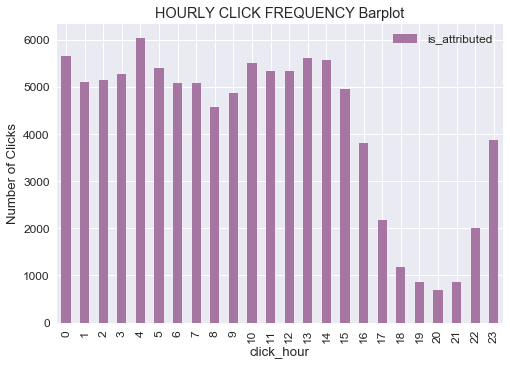

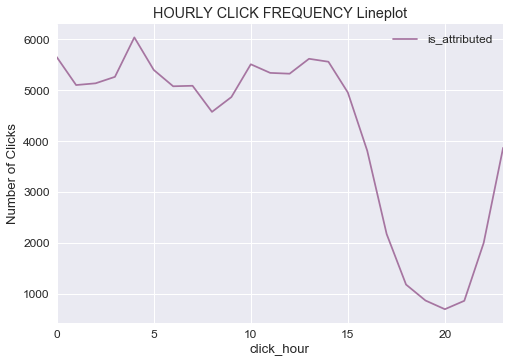

In [37]:
train_smp[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Barplot');
plt.ylabel('Number of Clicks');

train_smp[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).count().plot(color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Lineplot');
plt.ylabel('Number of Clicks');

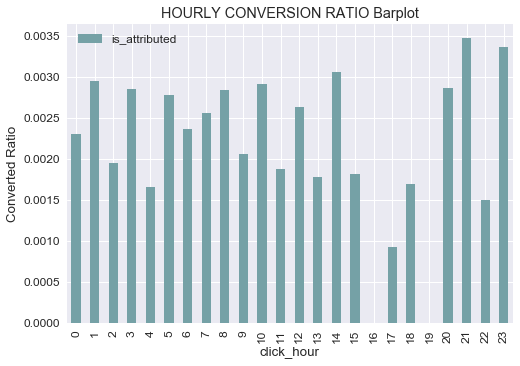

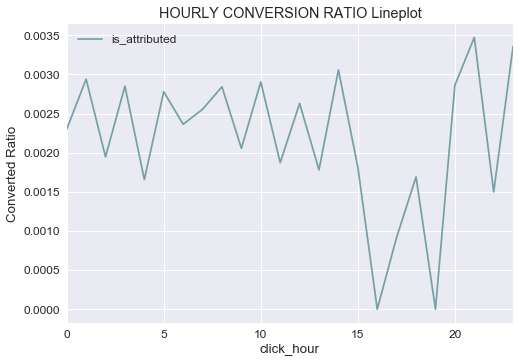

In [38]:
train_smp[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).mean().plot(kind='bar', color='#75a1a6')
plt.title('HOURLY CONVERSION RATIO Barplot');
plt.ylabel('Converted Ratio');

train_smp[['click_hour','is_attributed']].groupby(['click_hour'], as_index=True).mean().plot( color='#75a1a6')
plt.title('HOURLY CONVERSION RATIO Lineplot');
plt.ylabel('Converted Ratio');

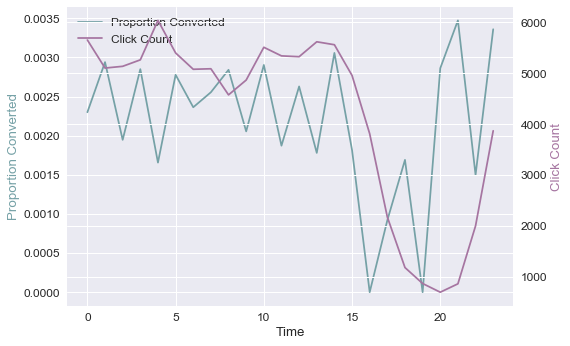

In [39]:
group = train_smp[['click_hour','is_attributed']].groupby(['click_hour'], as_index=False).mean()
x = group['click_hour']
ymean = group['is_attributed']
group = train_smp[['click_hour','is_attributed']].groupby(['click_hour'], as_index=False).count()
ycount = group['is_attributed']


fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("Proportion Converted")
par1.set_ylabel("Click Count")

#color1 = plt.cm.viridis(0)
#color2 = plt.cm.viridis(0.5)
color1 = '#75a1a6'
color2 = '#a675a1'

p1, = host.plot(x, ymean, color=color1,label="Proportion Converted")
p2, = par1.plot(x, ycount, color=color2, label="Click Count")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

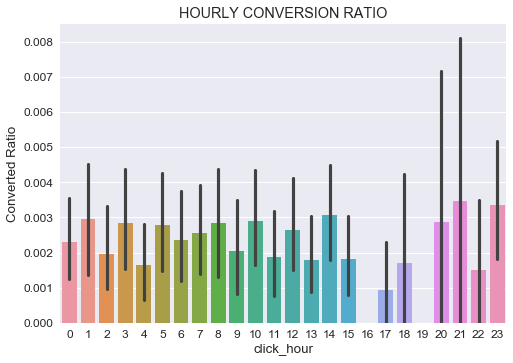

In [40]:
sns.barplot('click_hour', 'is_attributed', data=train_smp)
plt.title('HOURLY CONVERSION RATIO');
plt.ylabel('Converted Ratio');

In [41]:
train_smp['timePass'] = train_smp.attributed_time - train_smp.click_time

train_smp[train_smp.is_attributed == 1][:15]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_rnd,click_hour,timePass
284,224120,19,0,29,213,2017-11-08 02:22:13,2017-11-08 02:22:38,1,2017-11-08 02:00:00,2,00:00:25
481,272894,10,1,7,113,2017-11-08 06:10:05,2017-11-08 06:10:37,1,2017-11-08 06:00:00,6,00:00:32
1208,79001,19,0,0,213,2017-11-07 09:54:22,2017-11-07 11:59:05,1,2017-11-07 10:00:00,9,02:04:43
1341,131029,19,0,0,343,2017-11-09 10:58:46,2017-11-09 11:52:01,1,2017-11-09 11:00:00,10,00:53:15
1412,40352,19,0,0,213,2017-11-07 22:19:03,2017-11-08 01:55:02,1,2017-11-07 22:00:00,22,03:35:59
1666,48733,35,1,18,274,2017-11-07 12:25:50,2017-11-07 13:10:30,1,2017-11-07 12:00:00,12,00:44:40
1771,330861,35,1,22,21,2017-11-08 18:54:44,2017-11-08 22:39:52,1,2017-11-08 19:00:00,18,03:45:08
1917,309576,5,1,32,113,2017-11-09 08:47:51,2017-11-09 08:47:55,1,2017-11-09 09:00:00,8,00:00:04
3914,220571,71,1,25,3,2017-11-08 04:35:21,2017-11-08 04:37:46,1,2017-11-08 05:00:00,4,00:02:25
3992,240051,35,1,19,21,2017-11-08 08:07:13,2017-11-08 09:46:42,1,2017-11-08 08:00:00,8,01:39:29


In [42]:
train_smp.timePass.describe()

count                       227
mean     0 days 01:14:59.572687
std      0 days 02:25:05.392661
min             0 days 00:00:02
25%      0 days 00:00:52.500000
50%             0 days 00:03:18
75%      0 days 01:21:27.500000
max             0 days 12:52:21
Name: timePass, dtype: object

In [43]:
train['timePass'] = train.attributed_time - train.click_time

train[train.is_attributed == 1][:15]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,counts,timePass
103,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1,32,16:36:12
1504,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1,162,18:05:20
1798,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1,817,07:40:48
2102,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1,26,08:55:26
3056,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1,93,07:04:50
3220,82917,19,0,24,210,2017-11-06 16:00:04,2017-11-07 00:21:50,1,953,08:21:46
3939,126647,72,1,6,101,2017-11-06 16:00:05,2017-11-06 16:01:18,1,10,00:01:13
5282,57546,29,1,41,213,2017-11-06 16:00:07,2017-11-06 16:03:51,1,201,00:03:44
5377,189682,35,1,13,21,2017-11-06 16:00:07,2017-11-06 23:37:17,1,53,07:37:10
5438,24200,19,88,24,213,2017-11-06 16:00:07,2017-11-07 04:18:51,1,126,12:18:44


In [44]:
train.timePass.describe()

count                     18717
mean     0 days 03:48:02.893732
std      0 days 05:29:41.396810
min             0 days 00:00:00
25%             0 days 00:01:26
50%             0 days 00:25:03
75%             0 days 06:34:14
max             0 days 23:52:38
Name: timePass, dtype: object